## ***LAB 9 : Na&iuml;ve Bayes Classifier***

  1. Binary Classification using Na&iuml;ve Bayes Classifier
  
  2. Sentiment Analysis using Na&iuml;ve Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Binary Classification using Naive Bayes Classifier

Useful References : 
1. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

2. https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

3. https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41

**Note : The goal of this experiment is to perform and understand Naive Bayes classification by applying it on the below dataset, you can either fill in the below functions to get the result or you can create a class of your own using the above references to perform classification**

1. Generation of 2D training data

Text(0.5, 1.0, 'Data visualization')

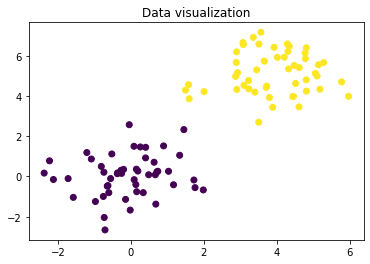

In [2]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')


2. Split the Dataset by Class Values (Create a Dictionary)

In [3]:
def class_dictionary(data, label):
    class_dict = {}
    class_0 = []
    class_1 = []

    for ind, val in enumerate(label):
        if val == 0:
            class_0.append(data[ind])
        else:
            class_1.append(data[ind])
    
    class_dict = {0:class_0 , 1:class_1}

    return class_dict

In [4]:
print(class_dictionary(data, label))
c = class_dictionary(data, label)

{0: [array([-1.57668985, -1.03982262]), array([-2.22908837,  0.77738534]), array([-0.72944014, -2.04059601]), array([-0.60307093, -0.80613793]), array([-0.1988887,  0.351987 ]), array([-1.0823819 ,  0.86873075]), array([-0.64602276, -0.4827786 ]), array([-0.55301333, -0.10534224]), array([-0.97041435, -1.24566304]), array([ 0.34076762, -0.80512206]), array([1.45488724, 2.3318086 ]), array([-0.14322361, -1.13894247]), array([-0.70767693, -2.65891323]), array([ 0.09163132, -0.15950217]), array([-2.12241532, -0.15106366]), array([-0.36859122,  0.13876704]), array([ 1.9871582 , -0.67035913]), array([0.15313648, 0.36290063]), array([-1.71898891, -0.10582707]), array([0.49004011, 0.08445841]), array([ 1.73020468, -0.1749493 ]), array([-0.04321608,  2.57402376]), array([0.67183735, 0.084099  ]), array([0.40754152, 1.45065429]), array([1.3396092 , 1.05418816]), array([0.40455369, 0.92363786]), array([ 1.17081537, -0.41316892]), array([-0.26643325,  0.30823425]), array([-0.25223481,  0.15357382

3. Calculate Mean, Std deviation and count for each column in a dataset

In [5]:
def get_variables(class_dict):
    var_dict = {}
    for label in class_dict:
        num_rec = len(class_dict[label])
        rec = np.array(class_dict[label])
        mu_list = []
        sig_list = []
        var_dict_entry = []
        var_dict[label] = []
        for i in range(rec.shape[1]):
            m = np.mean(rec[:,i])
            s = np.sqrt(np.sum([(fv[i]-m)**2 for fv in rec])/num_rec)
            mu_list.append(m)
            sig_list.append(s)
            var_dict_entry.append((m, s, num_rec))
        var_dict[label] = var_dict_entry
        # print("vde=",var_dict_entry)
    return var_dict

In [6]:
print(get_variables(c))

{0: [(-0.08143074021616499, 0.9927104621843587, 50), (0.05650317153356914, 1.0255393627439435, 50)], 1: [(3.891293527338697, 1.0208299436699904, 50), (5.136474984683965, 1.0354673362145788, 50)]}


3. Calculate Class Probabilities

In [22]:
def calculate_probability(x,mean,stdev):
  exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
  return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

def calculate_class_probabilities(summaries, row):
  probabilities = dict()
  # summaries contains dictionary of the format label:[(mean of col1, stddev of col1, num_rec of col1), ... ]
  # {0:[(-0.08, 0.99, 50), (0.05, 1.02, 50)],
  #  1:[(3.89, 1.02, 50) , (5.13, 1.03, 50)]}
  
  total_rec = float(np.sum([summaries[i][0][2] for i in summaries])) # get number of records in total

  for key, class_arr in summaries.items():
    # firstly, set P(k) to be fraction of records that are contained in 'k' class.     
    probabilities[key] = summaries[key][0][2]/total_rec
    for i in range(len(class_arr)): 
      mean, sig, count = class_arr[i]
      probabilities[key] *= calculate_probability(row[i], mean, sig) # for kth class, get probability of FV being from that class
    # in naive bayes, we assume independence of dimensions, so we simply multiply the abovementioned probabilities

  return probabilities

4. Test the model using some samples

Test Data Size :  20


Text(0.5, 1.0, 'Data visualization')

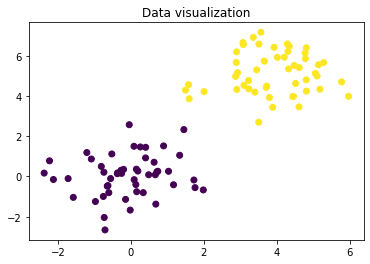

In [23]:
## Test Data Generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,10)
data2=np.random.multivariate_normal(mean2,var,10)
test_data=np.concatenate((data1,data2))
y_test=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print('Test Data Size : ',test_data.shape[0])
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

Testing for a sample point from test_data

In [24]:
class_dict = class_dictionary(data, label)
var_dict = get_variables(class_dict)

out = calculate_class_probabilities(var_dict,test_data[0])
print('Class Probabilites for the first sample of test dataset : ')
print(out)

Class Probabilites for the first sample of test dataset : 
{0: 0.014197204018409897, 1: 8.332975086162198e-16}


**As seen above the class probability for the 1st sample is given, we can observe that probability is higher for class 0 than 1 and hence imply that this datapoint belongs to class 0**


Now Calculate the class probabilities for all the data points in the test dataset and calculate the accuracy by comparing the predicted labels with the true test labels


In [25]:
## Write your code here
pred_labels = list()

for i in range(test_data.shape[0]):
  row = test_data[i]
  out = calculate_class_probabilities(var_dict, row)
  if(out[0] > out[1]):
    pred_labels.append(0)
  else:
    pred_labels.append(1)
pred_labels = np.array(pred_labels)

count = 0
for i, y_te in enumerate(y_test):
  if(pred_labels[i] == y_te):
    count = count + 1
test_acc = count*100/test_data.shape[0]
print("Testing Accuracy:", test_acc)

Testing Accuracy: 100.0


5. Use the Sci-kit Learn library to perform Gaussian Naive Bayes classifier on the above dataset, also report the accuracy and confusion matrix for the same

In [30]:
## Write your code here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

model = GaussianNB()
model.fit(data,label)
y_pred = model.predict(test_data)
test_acc = model.score(test_data, y_test)
print("Testing accuracy = ", test_acc*100)
print(confusion_matrix(y_test, y_pred))

Testing accuracy =  100.0
[[10  0]
 [ 0 10]]


## Sentiment Analysis using Naive Bayes Classifier

Go through the following [article](https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/) and implement the same 

**Keypoints** : 
  
  1. The link to the dataset is given in the above article, download the same to perform sentiment analysis

  2. Understanding how to deal with text data is very important since it requires a lot of preprocessing, you can go through this [article](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/) if you are interested in learning more about it
  
  3. Split the dataset into train-test and train the model
  
  4. Report the accuracy metrics and try some sample prediction outside of those present in the dataset


**Note : The goal of this experiment is to explore a practical use case of Naive bayes classifier as well as to understand how to deal with textual data, you can follow any other open source implemetations of sentiment analysis using naive bayes also**

Other References : 

1. https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

2. https://gist.github.com/CateGitau/6608912ca92733036c090676c61c13cd

https://github.com/Hrd2D/Sentiment-analysis-on-Google-Play-store-apps-reviews remove later

In [31]:
%pip install nltk


     ---------------------------------------- 1.5/1.5 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 KB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 KB 2.8 MB/s eta 0:00:00


You should consider upgrading via the 'c:\Users\bsidd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [41]:
## Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns',None)
data = pd.read_csv('google_play_store_apps_reviews_training.csv')

print(data.head())

          package_name                                             review  \
0  com.facebook.katana   privacy at least put some option appear offli...   
1  com.facebook.katana   messenger issues ever since the last update, ...   
2  com.facebook.katana   profile any time my wife or anybody has more ...   
3  com.facebook.katana   the new features suck for those of us who don...   
4  com.facebook.katana   forced reload on uploading pic on replying co...   

   polarity  
0         0  
1         0  
2         0  
3         0  
4         0  


In [42]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('package_name', axis=1)
    
    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data

data = preprocess_data(data)
# Split into training and testing data
x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

print("training set x = \n", x.head())
print("___________________________________")
print("testing set x = \n", x_test.head())
print("___________________________________")
print("training set y = \n", y.head())
print("___________________________________")
print("testing set y = \n", y_test.head())

training set x = 
 597    fantastic and helpful i find this app so helpf...
60     awsome great  type of social media nothing wro...
660    cannot use properly ŕ¤žŕ¤˛ŕ¤žŕ¤ ŕ¤ŕ¤žŕ¤šŕ¤żŕ...
876    2many adds. great game ruined by too many adds...
504               now perfect, with animated gif support
Name: review, dtype: object
___________________________________
testing set x = 
 375    ui & customization dark theme and color option...
355    app stops mid call having an issue with viber ...
252    bookmarks the option to open a bookmark in a n...
350    viber s.a.r.l. this app helps me to stay in co...
641    some time creating problm network problm it se...
Name: review, dtype: object
___________________________________
training set y = 
 597    1
60     0
660    0
876    0
504    1
Name: polarity, dtype: int64
___________________________________
testing set y = 
 375    0
355    0
252    0
350    1
641    0
Name: polarity, dtype: int64


In [43]:
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [44]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [45]:
model.score(x_test, y_test)

0.8565022421524664

In [47]:
model.predict(vec.transform(['I love this book! Though I hate the beginning. It would be great for you.']))

array([1], dtype=int64)